<a href="https://colab.research.google.com/github/nahuelalmeira/redesNeuronales/blob/master/practico3/Practico3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import os
import sys
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import torchvision
import torchvision.datasets as datasets
from torch import nn

%matplotlib inline


## Parámetros para graficar
#sns.set_style('darkgrid')
#sns.set_context('talk')

matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'

BLUE = '#1f77b4'
ORANGE = '#ff7f0e'
GREEN = '#2ca02c'
PURPLE = '#9467bd'

fig_dir = './figs'

characters = [
    r'$\mathrm{{{(a)}}}$', r'$\mathrm{{{(b)}}}$',
    r'$\mathrm{{{(c)}}}$', r'$\mathrm{{{(d)}}}$'
]

In [7]:
def display_digit(digit):
    plt.imshow(digit[0].numpy().squeeze(), cmap='gray')

In [8]:
## Set random seed for reproducibility
random_seed = 1
torch.manual_seed(random_seed)

In [9]:
mnist_data = datasets.MNIST(
    './data', train=True, download=True,
    transform=torchvision.transforms.Compose([
        torchvision.transforms.ToTensor(),
        torchvision.transforms.Normalize((0.1307,), (0.3081,))
    ])
)

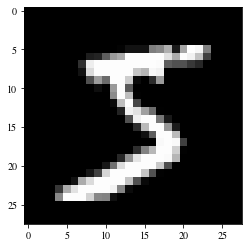

In [10]:
display_digit(mnist_data[0])

In [11]:
mnist_test = datasets.MNIST(
    './data', train=False, download=True,
    transform=torchvision.transforms.Compose([
        torchvision.transforms.ToTensor(),
        torchvision.transforms.Normalize((0.1307,), (0.3081,))
    ])
)

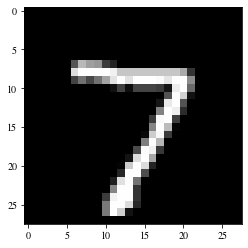

In [12]:
display_digit(mnist_test[0])

In [13]:
n_epochs = 3
batch_size_train = 1000
batch_size_test = 1000
learning_rate = 0.01
dropout_prob = 0.1
#momentum = 0.5
log_interval = 10

In [14]:
train_loader = torch.utils.data.DataLoader(mnist_data, batch_size=batch_size_train, shuffle=True)
test_loader  = torch.utils.data.DataLoader(mnist_test, batch_size=batch_size_test)

In [15]:
class Flatten(nn.Module):
    def forward(self, input):
        return input.view(input.size(0), -1)
    
input_size = 28*28
hidden_layer_size = 64
class net(nn.Module):
    def __init__(self):
        super(net, self).__init__()
        self.linear1 = nn.Linear(input_size, hidden_layer_size)
        self.linear2 = nn.Linear(hidden_layer_size, input_size)
        self.relu = nn.ReLU()
        self.flatten = Flatten()
        
    def forward(self, x):
        x = self.flatten(x)
        x = self.linear1(x)
        x = self.relu(x)
        x = self.linear2(x)
        return x

In [16]:
network = net()
optimizer = torch.optim.SGD(
    network.parameters(), 
    lr=learning_rate,
    #momentum=momentum
)

In [17]:
train_losses = []
train_counter = []
test_losses = []
test_counter = [i*len(train_loader.dataset) for i in range(n_epochs + 1)]

In [18]:
def train(epoch):
    network.train()
    crossent = nn.CrossEntropyLoss()
    for batch_idx, (data, target) in enumerate(train_loader):
        optimizer.zero_grad()
        output = network(data)
        loss = crossent(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % log_interval == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item()))
            train_losses.append(loss.item())
            train_counter.append(
                (batch_idx*64) + ((epoch-1)*len(train_loader.dataset)))